In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns

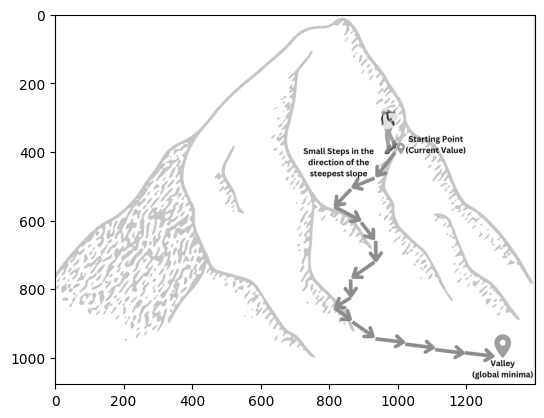

In [2]:
photo = cv2.imread('/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/OCR/GD.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(photo, cmap='gray')
plt.show()

## EASYOCR

In [3]:
#pip install easyocr
import easyocr

1. IMAGE WITH SINGLE LINE

In [4]:
img_path = '/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/OCR/Screenshot 2024-10-02 at 7.59.35 AM.png'
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(img_path)
result

Using CPU. Note: This module is much faster with a GPU.


[([[51, 7], [449, 7], [449, 331], [51, 331]], 'ONE', 0.7398886767308888)]

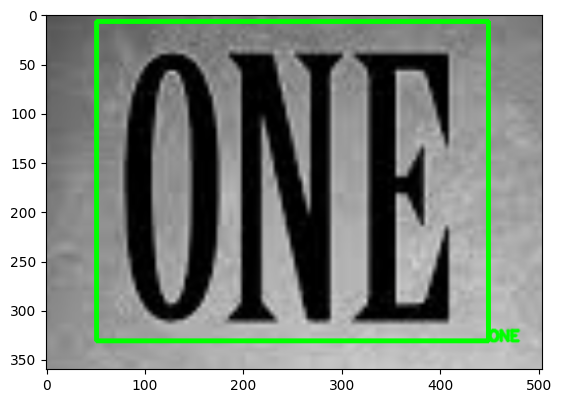

In [5]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(img_path)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 4)
img = cv2.putText(img, text, bottom_right, font, .5, (0,255,0), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [6]:
#image with multiple lines
photo_path = '/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/OCR/GD.png'
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(photo_path)
print(result[0])
print(result[1])
print(result[2])
print(result[3])
print(result[4])
print(result[5])
print(result[6])


Using CPU. Note: This module is much faster with a GPU.


([[1025, 344], [1195, 344], [1195, 385], [1025, 385]], 'Starting Point', 0.8765994433119256)
([[721, 384], [933, 384], [933, 420], [721, 420]], 'Small Steps in the', 0.7812192524403632)
([[1018, 382], [1202, 382], [1202, 412], [1018, 412]], '(Current Value)', 0.5824040893101544)
([[736, 418], [920, 418], [920, 448], [736, 448]], 'direction of the', 0.7889639134172245)
([[739, 451], [916, 451], [916, 484], [739, 484]], 'steepest slope', 0.8937240023266396)
([[1265, 999], [1348, 999], [1348, 1038], [1265, 1038]], 'Valley', 0.9999288543751548)
([[1211, 1035], [1400, 1035], [1400, 1071], [1211, 1071]], '(global minima)', 0.9999748834643445)


In [7]:
result

[([[1025, 344], [1195, 344], [1195, 385], [1025, 385]],
  'Starting Point',
  0.8765994433119256),
 ([[721, 384], [933, 384], [933, 420], [721, 420]],
  'Small Steps in the',
  0.7812192524403632),
 ([[1018, 382], [1202, 382], [1202, 412], [1018, 412]],
  '(Current Value)',
  0.5824040893101544),
 ([[736, 418], [920, 418], [920, 448], [736, 448]],
  'direction of the',
  0.7889639134172245),
 ([[739, 451], [916, 451], [916, 484], [739, 484]],
  'steepest slope',
  0.8937240023266396),
 ([[1265, 999], [1348, 999], [1348, 1038], [1265, 1038]],
  'Valley',
  0.9999288543751548),
 ([[1211, 1035], [1400, 1035], [1400, 1071], [1211, 1071]],
  '(global minima)',
  0.9999748834643445)]

2. IMAGE WITH MULTIPLE LINES

In [8]:
photo = cv2.imread(photo_path)

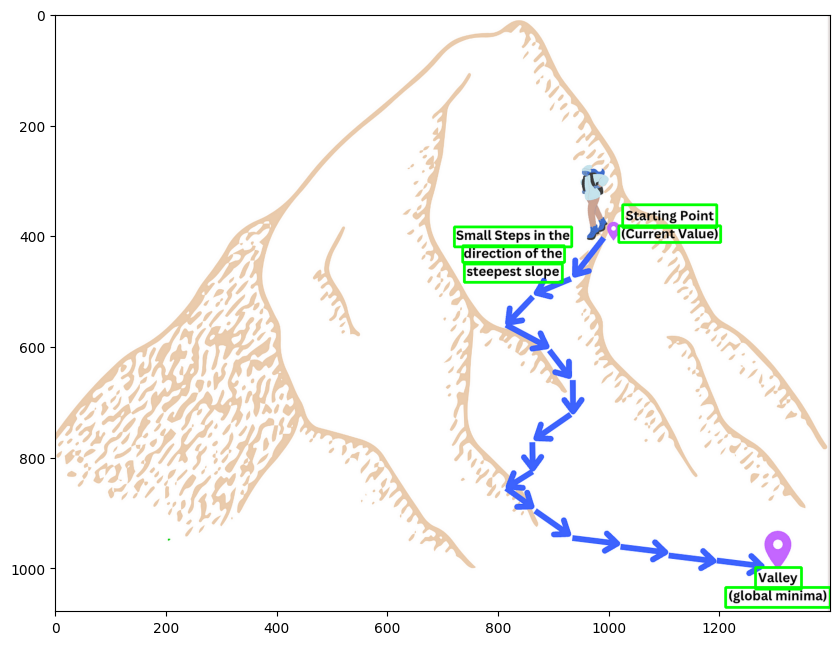

In [9]:
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    photo = cv2.rectangle(photo, top_left, bottom_right, (0,255,0), 4)
    #photo = cv2.putText(photo, text, bottom_right, font, 1, (255,0,0), 2, cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(photo)
plt.show()

## TESSERACT

In [10]:
#pip install tesseract
import pytesseract

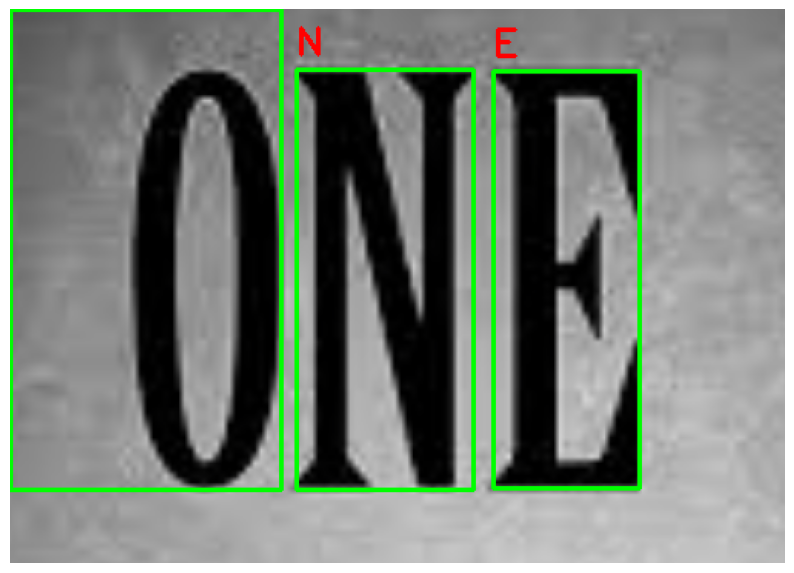

In [11]:
photo = cv2.imread('/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/OCR/Screenshot 2024-10-02 at 7.59.35 AM.png')

h, w, _ = photo.shape
boxes = pytesseract.image_to_boxes(photo)

# Draw rectangles around each character
for box in boxes.splitlines():
    box = box.split(' ')
    char = box[0]
    x, y, x2, y2 = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    # Tesseract returns coordinates based on bottom-left origin; flip y-axis
    cv2.rectangle(photo, (x, h - y), (x2, h - y2), (0, 255, 0), 2)
    cv2.putText(photo, char, (x, h - y2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Display the image with rectangles
plt.figure(figsize=(10, 10))
plt.imshow(photo)
plt.axis('off')  # Hide axes for better visualization
plt.show()


print(pytesseract.image_to_string(photo))

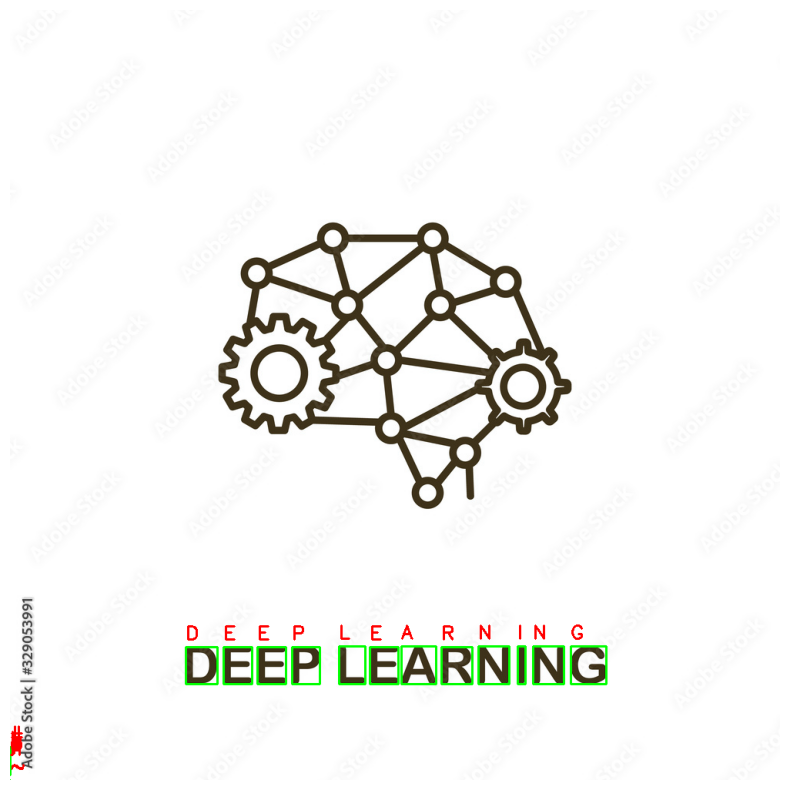

In [12]:
image = cv2.imread('/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/OCR/dl.jpg')

h, w, _ = image.shape
boxes = pytesseract.image_to_boxes(image)

# Draw rectangles around each character
for box in boxes.splitlines():
    box = box.split(' ')
    char = box[0]
    x, y, x2, y2 = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    # Tesseract returns coordinates based on bottom-left origin; flip y-axis
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)
    cv2.putText(image, char, (x, h - y2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Display the image with rectangles
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axes for better visualization
plt.show()


print(pytesseract.image_to_string(image))

In [2]:
import keras_ocr
import numpy as np

pipeline = keras_ocr.pipeline.Pipeline()

photo1 = cv2.imread('/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/OCR/Screenshot 2024-10-02 at 7.59.35 AM.png', cv2.IMREAD_GRAYSCALE)
photo2 = cv2.imread('/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/OCR/dl.jpg', cv2.IMREAD_GRAYSCALE)
photo3 = cv2.imread('/Users/umakantmanore/Desktop/amu/Dev_Enviroment2023/test_env/OCR/GD.png', cv2.IMREAD_GRAYSCALE)

image1 = keras_ocr.tools.read(photo1)
image2 = keras_ocr.tools.read(photo2)
image3 = keras_ocr.tools.read(photo3)

# Define the mean and variance for color images
mean = np.array([0.485, 0.456, 0.406])
variance = np.array([0.229, 0.224, 0.225])

def compute_input(image):
    if len(image.shape) == 2:  # Check if the image is grayscale
        image = np.stack((image,) * 3, axis=-1)  # Convert to 3 channels if grayscale
    image = image.astype('float32')
    image /= 255.0
    image -= mean
    image /= variance
    return image

prediction1 = pipeline.recognize([compute_input(image1)]) # Apply compute_input to each image
prediction2 = pipeline.recognize([compute_input(image2)])
prediction3 = pipeline.recognize([compute_input(image3)])

print(prediction1)
print(prediction2)
print(prediction3)

ModuleNotFoundError: No module named 'tensorflow.keras'